# 머신러닝 4차세션 예습과제

- 9/12 화요일 23:59 (4차세션 전날)까지 제출
- 제출 파일명 : 비타민_12기_4주차_예습과제_본인이름.ipynb  로 제출
- ipynb 파일로 제출
- 지각 제출은 허용하지 않음

# 실습 1

## 보팅 (25점)

이번 예습과제에 사용할 데이터는 사이킷런 내장 데이터인 wine 데이터입니다.

### 1-1. 다음 (a), (b), (c), (d)에 들어갈 용어를 쓰시오. (4점, 각 1점)

1. 보팅의 유형으로는 (a) 와 (b)가 있다.
2. (a) 은 예측한 결괏값들 중 (c)의 분류기가 결정한 예측값을 최종 결괏값으로 선정한다.
3. (b) 은 분류기들의 레이블 값 결정 (d)(를/을) 모두 더하고 이를 평균해서 이들 중 (d)(이/가) 가장 높은 레이블 값을 최종 결괏값으로 선정한다.

In [3]:
# 답안 : (a)하드보팅  (b)소프트보팅  (c)다수  (d)확률 

### 1-2. wine data로 보팅 방식의 앙상블을 구현하시오. '구현' 부분을 채우시면 됩니다 (21점)

아래 코드를 실행하시오

In [4]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn. model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataset = load_wine()
wine = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### 1-2 (1) 로지스틱 회귀와 KNN을 기반으로 소프트 보팅 방식으로 보팅 분류기를 생성하시오. (단, KNN의 군집의 개수는 8로 하시오.) (4점)

In [5]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

In [6]:
wine_y = pd.DataFrame(data = dataset.target)
wine_y

,0
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


### 1-2 (2) 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기를 생성하고, 데이터 셋을 훈련세트와 테스트 세트로 분류하시오. (4점)

In [7]:
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

X_train, X_test, y_train, y_test = train_test_split(wine,wine_y,test_size = 0.2, random_state = 156)

### 1-2 (3) VotingClassifier를 학습/예측/평가하시오.(fit, predict, 정확도 사용) (6점)

In [8]:
vo_clf.fit(X_train,y_train)
pred=vo_clf.predict(X_test)
print("보팅 정확도: ",accuracy_score(y_test,pred))

보팅 정확도:  0.9722222222222222


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 1-2 (4) 개별 모델에 대해 학습/예측/평가를 하시오.(for문 이용할 것) (7점)

In [9]:
classifiers = [lr_clf, knn_clf]
for i in classifiers:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    print(i, "정확도: ",accuracy_score(y_test,pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression() 정확도:  1.0
KNeighborsClassifier(n_neighbors=8) 정확도:  0.6111111111111112


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## 실습2

### 배깅(랜덤 포레스트) (25점)

In [10]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [11]:
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

dataset = load_wine()
labels = dataset.target
wine = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
wine['target'] = labels
wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [12]:
feature = wine.drop(columns = 'target', axis = 1)
y = wine.target

In [13]:
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size=0.2, random_state=10)

### 2-1 빈칸에 들어갈 말은 무엇일까요? (3점)
랜덤 포레스트는 여러 개의 데이터 세트를 중첩되게 분리하는 _____  분할 방식을 사용한다.

In [15]:
# 답 : 부트스트래핑

### 2-2 wine 데이터를 RandomForestClassifier에 적합시키고 성능을 측정하세요. (7점)
    - fit, predict, accuracy_score 이용  
    - random_state=0, max_depth=3 으로 설정

In [16]:
rf=RandomForestClassifier(random_state=0, max_depth=3)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print("rf 정확도: ", accuracy_score(y_test,pred))

rf 정확도:  0.8888888888888888


### 2-3 예측값과 실제값을 이용하여 오차행렬을 출력하세요. (3점)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[10,  0,  0],
       [ 1, 14,  3],
       [ 0,  0,  8]], dtype=int64)

### 2-4 GridSearchCV를 이용하여 최적하이퍼파라미터를 찾고 출력해보세요. (7점)
    - 폴드 개수는 3으로 설정

In [24]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[3,4,5]}    #숫자는 자유
grid=GridSearchCV(rf,param_grid=parameters,cv=3,refit=True)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


### 2-5 최적하이퍼파라미터로 RandomForestClassifier를 다시 학습시키고 성능을 측정하세요. (5점)

In [25]:
rf=RandomForestClassifier(random_state=0, max_depth=5)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print("rf 정확도: ", accuracy_score(y_test,pred))

rf 정확도:  0.9444444444444444


# 실습3

# XGBoost (25점)

In [26]:
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

dataset = load_wine()
labels = dataset.target
wine = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
wine['target'] = labels
wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


## Columns 설명
- 알콜(Alcohol)
- 말산(Malic acid)
- 회분(Ash)
- 회분의 알칼리도(Alcalinity of ash)
- 마그네슘(Magnesium)
- 총 폴리페놀(Total phenols)
- 플라보노이드 폴리페놀(Flavanoids)
- 비 플라보노이드 폴리페놀(Nonflavanoid phenols)
- 프로안토시아닌(Proanthocyanins)
- 색상의 강도(Color intensity)
- 색상(Hue)
- 희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
- 프롤린(Proline)
- 와인 종류(target)

In [27]:
feature = wine.drop(columns = 'target', axis = 1)
y = wine.target

### 3-1 wine 데이터를 xgbclassifier에 적합시키고 accuracy_score를 이용해 점수를 내세요 (6점)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size=0.3, random_state=1)
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.5, max_depth = 3)

In [33]:
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)
print(np.round(accuracy_score(y_test,pred),4))

[13:49:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.963


### 3-2 gridsearch를 이용해서 자유롭게 파라미터 설정하면서 점수를 높여보세요 (6점)
- 다음은 XGBClassifier의 주요 파라미터입니다. 되도록 0.97이상 점수가 나오게 설정해주세요
|주요파라미터|범위|설명|
|---|---|---|
|max_depth|0 ~ ∞|트리의 최대깊이 / 수가 커지면 복잡해지고 과적합 가능성▲|
|learning_rate|0 ~ 1|학습률 / 커지면 업데이트 속도▲|
|subsample|0 ~ 1|학습 시 데이터 샘플링 비율 지정 / 일반적으로 0.5 ~ 1 사이의 값을 가짐|

In [34]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [4,5,6],
          'learning_rate' : [0.05,0.1],
          'subsample' : [0.6,0.7]}

grid_xgb = GridSearchCV(xgb, param_grid = params, cv = 3, refit = True)
grid_xgb.fit(X_train, y_train)

print('GridSearchCV 최적의 파라미터:', grid_xgb.best_params_)
print('GridSearchCV 최적의 정확도:{0:.4f}'.format(grid_xgb.best_score_))

[13:51:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[13:51:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:51:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

### 3-3 early_stopping_rounds 설정 (7점)
- XGBClassifier는 조기 중단을 할 수 있습니다. early_stopping_rounds 파라미터를 임의로 설정해 조기 중단해주세요.

- early_stopping_rounds는 validation_1-mlogloss의 값이 최소값일 때 추가로 n번을 더 실시하고 그럼에도 불구하고 점수가 오르지 않으면 학습이 조기 종료되는 특징을 가지고 있습니다. 설정한 n값만큼 반복했는지 확인해주세요.

In [43]:
xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.5, max_depth = 10)
evals = [(X_train, y_train), (X_test, y_test)]

xgb.fit(X_train , y_train,  early_stopping_rounds=50,eval_set=evals,eval_metric="mlogloss", verbose=True)

y_preds = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

[0]	validation_0-mlogloss:0.55745	validation_1-mlogloss:0.59482
[1]	validation_0-mlogloss:0.32698	validation_1-mlogloss:0.37759
[2]	validation_0-mlogloss:0.20214	validation_1-mlogloss:0.25890
[3]	validation_0-mlogloss:0.13034	validation_1-mlogloss:0.19014
[4]	validation_0-mlogloss:0.08766	validation_1-mlogloss:0.14453
[5]	validation_0-mlogloss:0.06113	validation_1-mlogloss:0.11933
[6]	validation_0-mlogloss:0.04530	validation_1-mlogloss:0.10537
[7]	validation_0-mlogloss:0.03470	validation_1-mlogloss:0.09035
[8]	validation_0-mlogloss:0.02709	validation_1-mlogloss:0.08565
[9]	validation_0-mlogloss:0.02235	validation_1-mlogloss:0.08144
[10]	validation_0-mlogloss:0.01912	validation_1-mlogloss:0.08141
[11]	validation_0-mlogloss:0.01645	validation_1-mlogloss:0.07856
[12]	validation_0-mlogloss:0.01457	validation_1-mlogloss:0.07699
[13]	validation_0-mlogloss:0.01320	validation_1-mlogloss:0.07501
[14]	validation_0-mlogloss:0.01283	validation_1-mlogloss:0.07516
[15]	validation_0-mlogloss:0.01253	

### 3-4 plot_importance 시각화 (6점)
- plot_importance()를 이용하여 feature의 중요도를 시각화해주세요

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

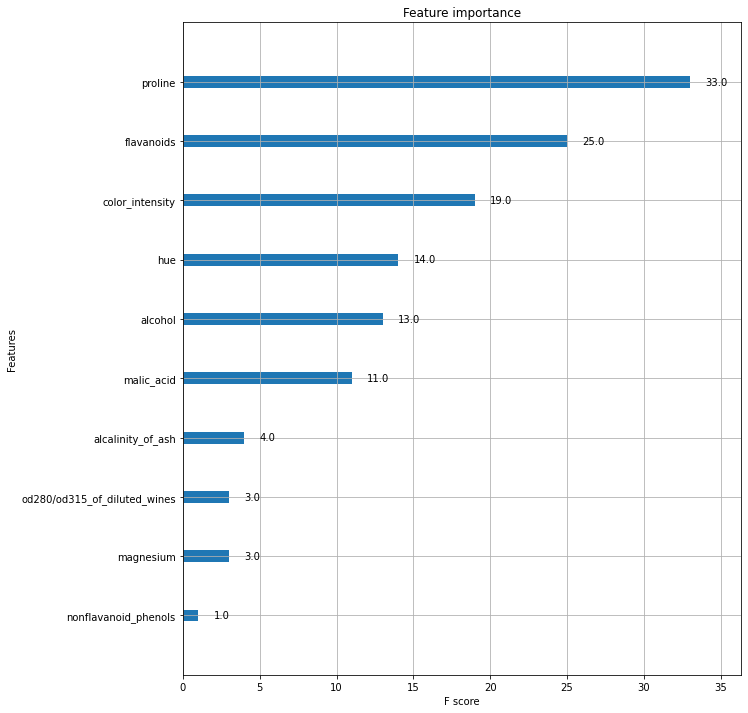

In [39]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb,ax=ax)

## 실습4

## LightGBM(25점)

In [40]:
# LGBMClassifier
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

wine = load_wine()
wine_data = wine.data
wine_target = wine.target
df_wine = pd.DataFrame(data = wine_data, columns=[wine.feature_names])
df_wine['target'] = wine.target

df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### 4-1 `train_test_split` 을 사용하여 80%는 학습용 데이터로 20%는 테스트용 데이터로 분리하세요. (random_state = 12) (2점)


In [44]:
X_train,X_test,y_train,y_test=train_test_split(wine_data,wine_target,test_size=0.2,random_state=12)

### 4-2 `X_train`, `y_train` 을 90%는 학습용 데이터로, 10%는 검증용 데이터로 분리하세요. (random_state = 12) (5점)

In [45]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=12)

### 4-3 LGBM classifier 객체를 생성하세요. (n_estimators = 400) (5점)

In [48]:
lgbm= LGBMClassifier(n_estimators=400)

### 4-4 학습을 진행하세요. (단, `early_stopping_round` 를 이용하여 55회에 조기 중단 시키세요.) (5점)

In [49]:
evals=[(X_test,y_test)]
lgbm.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss",eval_set=evals,verbose=True)
pred=lgbm.predict(X_test)

[1]	valid_0's multi_logloss: 0.988718
[2]	valid_0's multi_logloss: 0.881702
[3]	valid_0's multi_logloss: 0.776051
[4]	valid_0's multi_logloss: 0.700086
[5]	valid_0's multi_logloss: 0.628696
[6]	valid_0's multi_logloss: 0.564431
[7]	valid_0's multi_logloss: 0.519449
[8]	valid_0's multi_logloss: 0.466448
[9]	valid_0's multi_logloss: 0.432276
[10]	valid_0's multi_logloss: 0.390307
[11]	valid_0's multi_logloss: 0.359687
[12]	valid_0's multi_logloss: 0.333684
[13]	valid_0's multi_logloss: 0.312724
[14]	valid_0's multi_logloss: 0.289775
[15]	valid_0's multi_logloss: 0.270365
[16]	valid_0's multi_logloss: 0.254377
[17]	valid_0's multi_logloss: 0.240769
[18]	valid_0's multi_logloss: 0.226286
[19]	valid_0's multi_logloss: 0.211887
[20]	valid_0's multi_logloss: 0.202327
[21]	valid_0's multi_logloss: 0.19613
[22]	valid_0's multi_logloss: 0.180602
[23]	valid_0's multi_logloss: 0.171935
[24]	valid_0's multi_logloss: 0.164163
[25]	valid_0's multi_logloss: 0.158857
[26]	valid_0's multi_logloss: 0.151

### 4-5 `plot_importance()` 를 이용하여 feature 중요도를 시각화하세요. (8점)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

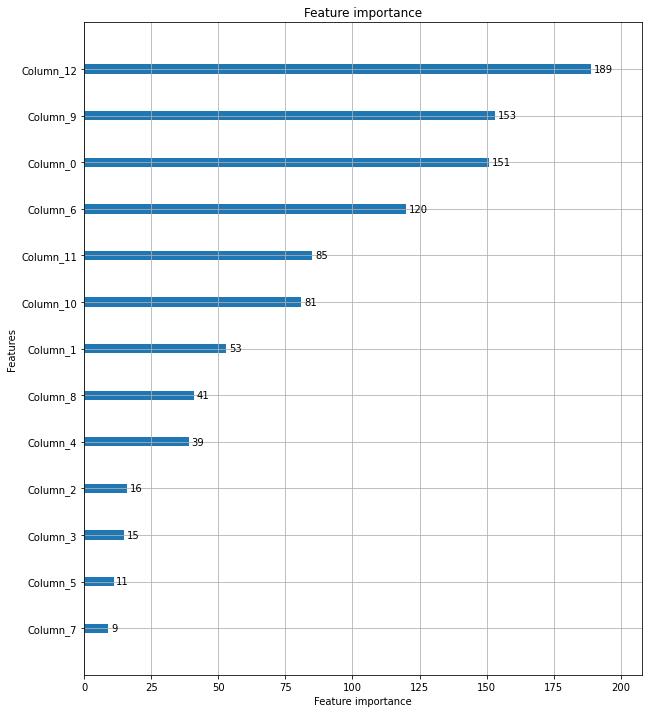

In [50]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm,ax=ax)

# 실습5

### 앙상블 학습

보팅(Voting) 방식: 같은 데이터셋에 대해 서로 다른 여러 개의 분류기의 예측값을 결합하여 최종 예측값을 결정하는 앙상블 방법

다음은 보팅 분류기를 이용한 앙상블 학습에 필요한 라이브러리 및 데이터셋입니다.


*   VotingClassifier: 보팅 방식의 앙상블을 구현한 클래스
*   LogisticRegrssion: 로지스틱 회귀 클래스
*   KNeighborsClassifier: K Nearest Neighbor(KNN) 분류 알고리즘 클래스
*   load_breast_cancer: 종양의 크기와 모양에 관한 속성들과 종양의 악성 여부를 레이블로 하는 데이터셋, 위스콘신 유방암 데이터 세트
*   train_test_split: 데이터 분할
*   accuracy_score: 분류 모델의 정확도






다음 라이브러리 및 데이터를 로드해주세요.

In [51]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

Q. 다음 과정에 따라 보팅 분류기를 구현하고 정확도를 측정하세요.

In [54]:
# 로지스틱 회귀와 KNN 개별 분류기 객체를 생성하여 각각 변수에 저장
lr_cl=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

# 위에서 생성한 두 모델을 기반으로하는 소프트 보팅 객체를 생성
vo_clf=VotingClassifier(estimators=[('LR',lr_cl),('KNN',knn_clf)],voting='soft')

# 테스트 사이즈를체 데이터의 20%로 하여 train, test 데이터 셋을 분류
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=12)

# 보팅 분류기로 학습 후 테스트 데이터 예측 및 정확도 평가
# 정확도는 소수점 넷째자리까지 출력
vo_clf.fit(X_train,y_train)
pred=vo_clf.predict(X_test)
print(np.round(accuracy_score(y_test,pred),4))

0.9375


### 랜덤 포레스트

다음 코드를 실행해 주세요.

In [55]:
from sklearn.ensemble import RandomForestClassifier

Q. 보팅 분류기를 구현할 때 만든 X_train, X_test, y_train, y_test을 이용하여 랜덤포레스트를 구현하고 정확도를 측정하세요.

In [57]:
# 랜덤 포레스트 객체를 rf_clf 변수로 저장
# 이때 max_depth = 16, n_estimators = 50, random_state = 124로 지정
rf_clf=RandomForestClassifier(max_depth = 16, n_estimators = 50, random_state = 124)

# rf_clf를 이용하여 랜덤 포레스트 학습 및 예측 성능을 평가
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)

# 정확도를 accuracy변수에 저장
accuracy=accuracy_score(y_test,pred)

### GBM

다음 코드를 실행해 주세요.

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
import time
start_time = time.time()

Q. GBM를 구현하고 GBM 모델의 정확도와 수행 시간을 출력하여 예측 성능을 나타내세요.

In [61]:
start_time = time.time()
gb_clf=GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train,y_train)
pred=gb_clf.predict(X_test)
print("정확도: ",accuracy_score(y_test,pred))
print("수행시간: ",time.time()-start_time)

정확도:  0.75
수행시간:  0.41800475120544434


### XGB

다음 코드를 실행해 주세요.

In [67]:
import xgboost as xgb

Q1. 보팅 분류기를 구현할 때 만든 X_train, y_train을 다시 90%는 학습용, 10%는 검증용 데이터로 분리하세요.(random_state = 156)

In [68]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=12)

Q2. Q1문제에서 분리한 데이터로 XGBoost만의 전용 데이터 객체인 학습, 검증, 테스트용 Dmatrix를 생성하세요.

In [69]:
dtrain = xgb.DMatrix(X_train, y_train)
dval = xgb.DMatrix(X_validation, y_validation)
dtest = xgb.DMatrix(X_test)

### LightGBM

현재 LightGBM의 버전과 책과의 버전이 달라 에러가 발생합니다.

아래의 코드를 실행해 lightGBM의 버전이 3.2.2가 아니라면

LightGBM의 버전을 3.3.2로 다운그레이드 하고 런타임을 재시작해주세요

In [63]:
import lightgbm

print(lightgbm.__version__)

3.3.2


In [ ]:
#pip install lightgbm==3.3.2

다음 코드를 실행해 주세요.

In [64]:
from lightgbm import LGBMClassifier #import

Q1. lgbm_wrapper라는 변수에 LGBClassifier 객체를 할당해주세요 (이때 부스팅 반복수를 200, 학습률을 0.03으로 설정해주세요)

In [71]:
from lightgbm import LGBMClassifier
lgbm_wrapper=LGBMClassifier(num_boost_round=200,learning_rate=0.03)

Q2. XGB의 Q1문제에서 분리한 데이터를 이용해 LightGBM을 학습시키고, 예측해 주세요 (early_stopping_rounds=50, eval_metric=logloss로 하고 반복수를 보이게 해주세요)

또한 왜 해당 반복수에서 작업 수행이 멈추었는지 설명해 주세요

In [74]:
evals=[(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=50,eval_metric="logloss",eval_set=evals,verbose=True)
pred=lgbm.predict(X_test)

[LightGBM] [Warning] num_iterations is set=200, num_boost_round=200 will be ignored. Current value: num_iterations=200
[1]	valid_0's multi_logloss: 1.13724
[2]	valid_0's multi_logloss: 1.10618
[3]	valid_0's multi_logloss: 1.07745
[4]	valid_0's multi_logloss: 1.04945
[5]	valid_0's multi_logloss: 1.02407
[6]	valid_0's multi_logloss: 0.998687
[7]	valid_0's multi_logloss: 0.975101
[8]	valid_0's multi_logloss: 0.95205
[9]	valid_0's multi_logloss: 0.930993
[10]	valid_0's multi_logloss: 0.908972
[11]	valid_0's multi_logloss: 0.886937
[12]	valid_0's multi_logloss: 0.865642
[13]	valid_0's multi_logloss: 0.8431
[14]	valid_0's multi_logloss: 0.821812
[15]	valid_0's multi_logloss: 0.800039
[16]	valid_0's multi_logloss: 0.779505
[17]	valid_0's multi_logloss: 0.760117
[18]	valid_0's multi_logloss: 0.741794
[19]	valid_0's multi_logloss: 0.725349
[20]	valid_0's multi_logloss: 0.709933
[21]	valid_0's multi_logloss: 0.695472
[22]	valid_0's multi_logloss: 0.678598
[23]	valid_0's multi_logloss: 0.662627
[

검증 데이터의 loss나 성능지표가 50회 동안 향상되지 않으면 조기 종료하기 때문이다.

Q3. plot_importance()를 이용해 feature의 중요도를 시각화해주세요

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

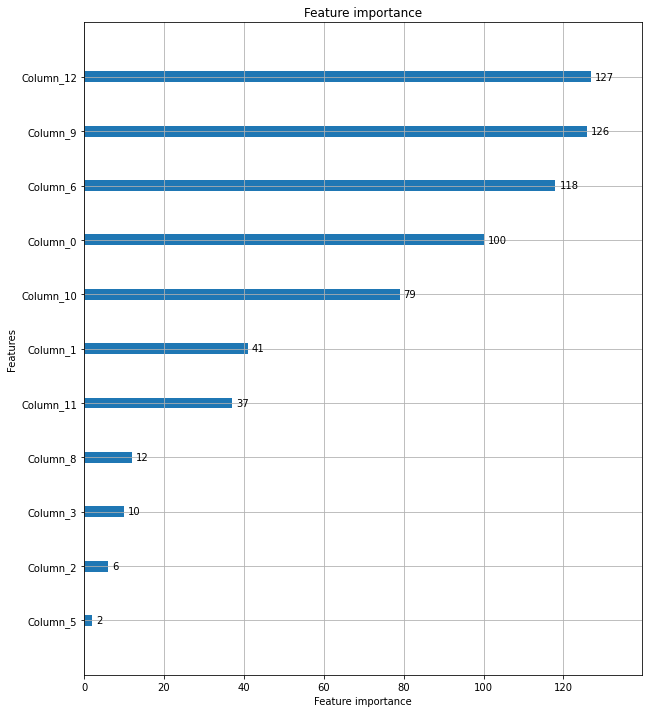

In [75]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)